<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Google-trends" data-toc-modified-id="Google-trends-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Google trends</a></span></li><li><span><a href="#Scraper-[dont-run-here,-just-for-development]" data-toc-modified-id="Scraper-[dont-run-here,-just-for-development]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scraper [dont run here, just for development]</a></span><ul class="toc-item"><li><span><a href="#Grab-content-of-main-page-of-70-news-pages-directly-and-save-as-html" data-toc-modified-id="Grab-content-of-main-page-of-70-news-pages-directly-and-save-as-html-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Grab content of main page of 70 news pages directly and save as html</a></span></li><li><span><a href="#Grab-content-using-newsapi" data-toc-modified-id="Grab-content-using-newsapi-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Grab content using newsapi</a></span></li></ul></li></ul></div>

### Google trends

In [120]:


import pandas as pd
from pytrends.request import TrendReq
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import datetime as dt

In [181]:
start_date = dt.datetime(2020, 4, 1)
data = pd.DataFrame()
for d in (start_date + dt.timedelta(n) for n in range(2)):
    pt = TrendReq()
    pt.build_payload(['covid'], timeframe=d.strftime('%Y-%m-%d')+' '+(d+dt.timedelta(1)).strftime('%Y-%m-%d'))
    uk = pt.interest_by_region(resolution='COUNTRY', inc_low_vol=False, inc_geo_code=True)
    print(uk.sum(axis=0))
    uk = uk.loc[uk.index.intersection(['United Kingdom', 'Germany']), :]
    uk = uk.assign(date=d.strftime('%Y-%m-%d'))
    uk=uk.transpose().add_prefix(d.strftime('%Y-%m-%d')+'_').transpose()
    data = pd.concat([data,uk])



geoCode    AFALDZASADAOAIAQAGARAMAWAUATAZBSBHBDBBBYBEBZBJ...
covid                                                   1248
dtype: object
geoCode    AFALDZASADAOAIAQAGARAMAWAUATAZBSBHBDBBBYBEBZBJ...
covid                                                   1387
dtype: object


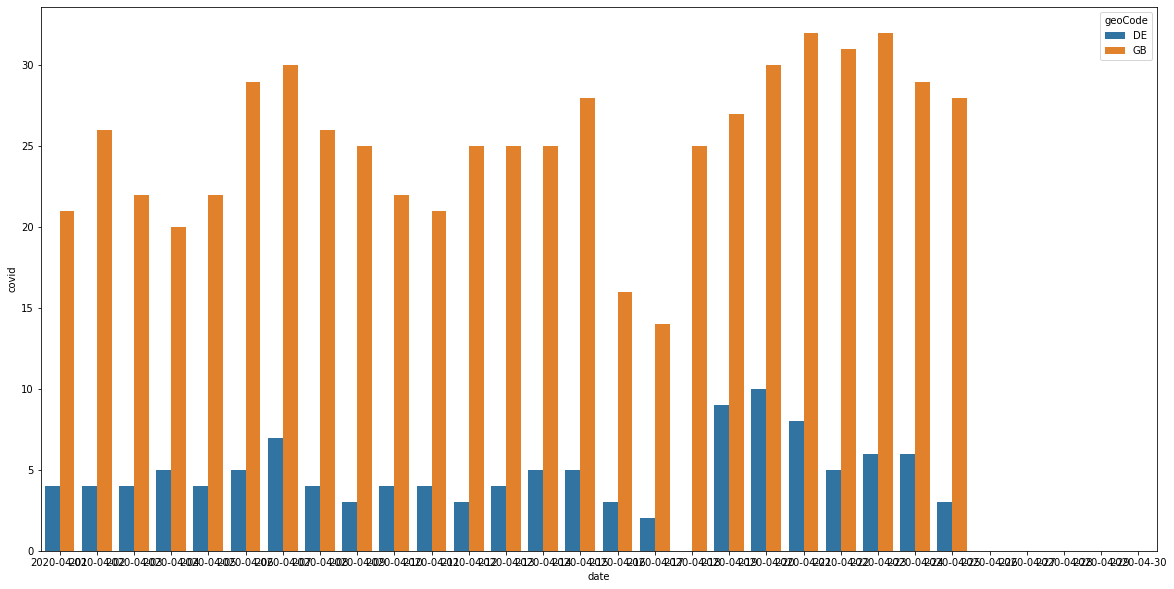

In [180]:
plt.figure(figsize=(20,10))
sns.barplot(data=data, x="date", hue="geoCode", y="covid")
# don't use this, it's always normalized to country with MOST covid searches, jsut use the within-country stats below

In [121]:
pt = TrendReq()
pt.build_payload(['covid', 'covid19'], geo='GB', timeframe='2020-01-01 2020-04-30')
uk = pt.interest_over_time()

pt = TrendReq()
pt.build_payload(['covid', 'covid19'], geo='GE', timeframe='2020-01-01 2020-04-30')
ge = pt.interest_over_time()
uk=uk.assign(country="UK")
ge=ge.assign(country="GE")
data = pd.concat([uk,ge])


covid  covid19  isPartial country
date                                         
2020-01-01      0        0      False      UK
2020-01-02      0        0      False      UK
2020-01-03      0        0      False      UK
2020-01-04      0        0      False      UK
2020-01-05      0        0      False      UK
...           ...      ...        ...     ...
2020-04-21     35        1      False      GE
2020-04-22     31        0      False      GE
2020-04-23     30        1      False      GE
2020-04-24     35        2      False      GE
2020-04-25     35        4      False      GE

[232 rows x 4 columns]

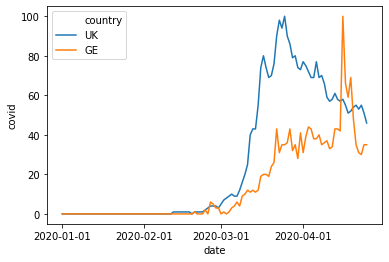

In [122]:
data["date"] = data.index
data["date"] = data["date"].dt.strftime('%Y-%m-%d')
sns.lineplot(x="date", y="covid", hue="country", data=data)
ax = plt.gca()
xticks= ax.get_xticks()
ax.set_xticks([0, 31, 60, 91])

In [101]:
start = (dt.datetime(2020,1,1) - dt.datetime(1970,1,1)).days


x = dt.datetime(2020, 1, 1)
q["date"] = q.index
q["date"] = q["date"].dt.strftime('%Y-%m-%d')
#sns.lineplot(x=date, y=covid, data=q)
#q["date_new"] = q.index.strftime("%d-%m-%Y")
#sns.lineplot(x=date, y=covid, data=q)
#q.date_new
#q.date[0]
sns.lineplot(x="date", y=["uk_covid", "ge_covid"], data=q)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()

xticks = np.array(xticks)+start
# convert all xtick labels to selected format from ms timestamp
ax.set_xticklabels([pd.to_datetime(tm, unit='d').strftime('%Y-%m\n') for tm in xticks],
 rotation=50);
ax.set_xticks([1, 30, 60, 90])


ValueError: array length 2 does not match index length 92

### Scraper [dont run here, just for development]

#### Grab content of main page of 70 news pages directly and save as html

In [261]:
import urllib3
import pandas as pd
import numpy as np
import datetime as dt
import os
import subprocess
import requests
import json 
import urllib.request, urllib.error, urllib.parse

In [262]:
urls = pd.read_csv('../../data/online_data/news/unique_media_list.csv')
urls=urls.dropna().reset_index() 
urls['name'] = urls['name'].str.replace(' ', '').str.replace('.', '')
urls['identifier'] = urls.index.astype('str')+'_'+urls['name']

now = dt.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')


#df['Name'] = df['First'].str.cat(df['Last'],sep=" ")
#df
for iux, ur in enumerate(urls.url):
    print(ur)
    ## Make dir
    path = '../../data/online_data/news/'+urls.identifier[iux]+'/'
    bashCommand = 'mkdir '+path
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    response = urllib.request.urlopen(ur)
    webContent = response.read()
    f = open(path+now+urls.identifier[iux]+'.html', 'wb')
    f.write(webContent)
    f.close
    


https://twitter.com/hashtag/news?lang=en
https://www.bbc.com/news
https://www.theguardian.com/international
https://news.sky.com/
https://www.getsurrey.co.uk/news/surrey-news/
https://www.telegraph.co.uk/
https://www.itv.com/news/
https://www.buzzfeednews.com/
https://news.google.com/topics/CAAqIggKIhxDQkFTRHdvSkwyMHZNREZqY0hsNUVnSmxiaWdBUAE?hl=en-US&gl=US&ceid=US%3Aen
https://www.dailymail.co.uk/home/index.html
https://edition.cnn.com/
https://www.mirror.co.uk/
https://www.birminghammail.co.uk/
https://www.birminghammail.co.uk/
https://www.socialist.net/news-and-analysis/
https://www.washingtonpost.com/
https://www.ft.com/
https://metro.co.uk/news/
https://news.yahoo.com/
https://www.thesun.co.uk/
http://simplepolitics.co.uk/
https://www.england.nhs.uk/news/
https://www.bing.com/news
https://www.dailymail.co.uk/home/index.html
https://www.express.co.uk/
https://www.sueddeutsche.de/
https://www.faz.net/aktuell/
https://www.heraldscotland.com/
https://www.edp24.co.uk/news
https://www.be

#### Grab content using newsapi

In [330]:
from newsapi import NewsApiClient
import json

In [351]:
srcs = pd.read_csv('../../data/online_data/news_via_newsapi/sources.csv')
now = dt.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')
# Init
newsapi = NewsApiClient(api_key='480d105c9f3f44869570ee0da7b4ea0d')
kwds = ['coronavirus', 'covid']
for kw in kwds:
    for sidx, src in enumerate(srcs.src):
        if srcs.lang[sidx]=='en':
            keywords =kw
            language = 'en'
        elif srcs.lang[sidx]=='de':
            keywords =kw
            language = 'de'
        print('Keyword: '+keywords)
        print('Source: '+src+' '+srcs.domain[sidx])
        print((dt.datetime.now()-dt.timedelta(1)).strftime('%Y-%m-%d')+' - '+dt.datetime.now().strftime('%Y-%m-%d'))
        da = newsapi.get_everything(q=keywords,
                                      sources=src,
                                      domains=srcs.domain[sidx],
                                      from_param=(dt.datetime.now()-dt.timedelta(1)).strftime('%Y-%m-%d'),
                                      to=dt.datetime.now().strftime('%Y-%m-%d'),
                                      language=language,
                                      sort_by='popularity',
                                      page=5)

        data = pd.DataFrame(da['articles'])
        ident = str(sidx)+'_'+src
        path = '../../data/online_data/news_via_newsapi/'+kw+'/'+ident+'/'
        bashCommand = 'mkdir '+path
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()   

        data.to_csv(path+ident+'_'+now+'.csv')
    

coronavirus
bbc-news
http://www.bbc.co.uk/
2020-04-30
2020-05-01
coronavirus
the-washington-post
https://www.washingtonpost.com
2020-04-30
2020-05-01
coronavirus
the-washington-times
https://www.washingtontimes.com/
2020-04-30
2020-05-01
coronavirus
bild
http://www.bild.de
2020-04-30
2020-05-01
coronavirus
cnn
https://edition.cnn.com/uk
2020-04-30
2020-05-01
coronavirus
die-zeit
http://www.zeit.de/index
2020-04-30
2020-05-01
coronavirus
google-news-uk
https://news.google.com
2020-04-30
2020-05-01
coronavirus
independent
http://www.independent.co.uk
2020-04-30
2020-05-01
covid
bbc-news
http://www.bbc.co.uk/
2020-04-30
2020-05-01
covid
the-washington-post
https://www.washingtonpost.com
2020-04-30
2020-05-01
covid
the-washington-times
https://www.washingtontimes.com/
2020-04-30
2020-05-01
covid
bild
http://www.bild.de
2020-04-30
2020-05-01
covid
cnn
https://edition.cnn.com/uk
2020-04-30
2020-05-01
covid
die-zeit
http://www.zeit.de/index
2020-04-30
2020-05-01
covid
google-news-uk
https://n